In [1]:
pip install 'typing-extensions>=4.3.0'

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

2024-04-13 15:59:37.529913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/riccardocaruso08/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import yfinance as yf

In [4]:
ticker = 'STLAM.MI'
stock = yf.Ticker(ticker)
hist_data = stock.history(period='10y')

In [5]:
STLN=pd.DataFrame(hist_data['Close'])
STLN.rename(columns={'Close':'Price'}, inplace=True)
STLN

,Price
Date,
2014-04-14 00:00:00+02:00,3.354367
2014-04-15 00:00:00+02:00,3.203999
2014-04-16 00:00:00+02:00,3.327378
2014-04-17 00:00:00+02:00,3.377501
2014-04-22 00:00:00+02:00,3.497024
...,...
2024-04-08 00:00:00+02:00,24.895000
2024-04-09 00:00:00+02:00,25.075001
2024-04-10 00:00:00+02:00,25.230000


In [6]:
STLN['returns'] = np.log(STLN['Price'] / STLN['Price'].shift(1))

In [7]:
STLN['direction'] = np.where(STLN['returns'] > 0, 1, 0)
lags=7

In [41]:
#log returns shifted by the respective number of lags.
# rows indicating the “patterns” emerging in the seven feature

In [9]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    STLN[col] = STLN['returns'].shift(lag)
    cols.append(col)
STLN.dropna(inplace=True)

In [1]:
#adding feature-> momentum

In [10]:
STLN['momentum'] = STLN['returns'].rolling(5).mean().shift(1)
STLN

,Price,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,momentum
Date,,,,,,,,,,,
2014-04-28 00:00:00+02:00,3.283039,0.002940,1,-0.029593,-0.015882,-0.020608,0.034776,0.014952,0.037785,-0.045864,NaN
2014-04-29 00:00:00+02:00,3.404490,0.036326,1,0.002940,-0.029593,-0.015882,-0.020608,0.034776,0.014952,0.037785,NaN
2014-04-30 00:00:00+02:00,3.346657,-0.017133,0,0.036326,0.002940,-0.029593,-0.015882,-0.020608,0.034776,0.014952,NaN
2014-05-02 00:00:00+02:00,3.358223,0.003450,1,-0.017133,0.036326,0.002940,-0.029593,-0.015882,-0.020608,0.034776,NaN
2014-05-05 00:00:00+02:00,3.304244,-0.016204,0,0.003450,-0.017133,0.036326,0.002940,-0.029593,-0.015882,-0.020608,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08 00:00:00+02:00,24.895000,0.011921,1,-0.018127,0.001398,-0.018418,-0.033385,-0.012823,0.003943,-0.021402,-0.016271
2024-04-09 00:00:00+02:00,25.075001,0.007204,1,0.011921,-0.018127,0.001398,-0.018418,-0.033385,-0.012823,0.003943,-0.011322
2024-04-10 00:00:00+02:00,25.230000,0.006162,1,0.007204,0.011921,-0.018127,0.001398,-0.018418,-0.033385,-0.012823,-0.003204


In [11]:
import random as rnd
from numpy import random 

In [12]:
optimizer = Adam(learning_rate=0.0001)

In [13]:
def set_seeds(seed=1000):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(1000)

In [14]:
#Sequential model is instantiated.

In [15]:
set_seeds()
model = Sequential()

In [16]:
#The hidden layers and the output layer are defined.

In [17]:
model.add(Dense(64, activation='relu',
       input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/Users/riccardocaruso08/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cutoff = '2020-12-31'

In [3]:
#Defines the cutoff date between the training and test data.
#In Sample, anche detto Training Set, e Out of Sample, anche detto Test Set. 
#permettere di individuare la qualità dei segnali individuati dal modello stabilito

In [20]:
training_data = STLN[STLN.index < cutoff].copy()
mu, std = training_data.mean(), training_data.std()

In [7]:
#Normalizes the features data by Gaussian normalization.

In [21]:
training_data_n = (training_data - mu) / std

In [22]:
test_data = STLN[STLN.index >= cutoff].copy()
test_data_n = (test_data - mu) / std

In [23]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

CPU times: user 9.09 s, sys: 869 ms, total: 9.96 s
Wall time: 8.17 s


In [24]:
model.evaluate(training_data_n[cols], training_data['direction'])

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5365 - loss: 0.7218


[0.7214139699935913, 0.5271226167678833]

In [4]:
#Predicts the market direction in-sample.

In [25]:
 pred = np.where(model.predict(training_data_n[cols]) > 0.5, 1, 0)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
pred[:30].flatten()

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [1]:
#Transforms the predictions into long-short positions

In [27]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [6]:
#Calculates the strategy returns given the positions.

In [28]:
training_data['strategy'] = (training_data['prediction'] * training_data['returns'])
training_data[['returns', 'strategy']].sum().apply(np.exp)

returns     3.041264
strategy    4.550093
dtype: float64

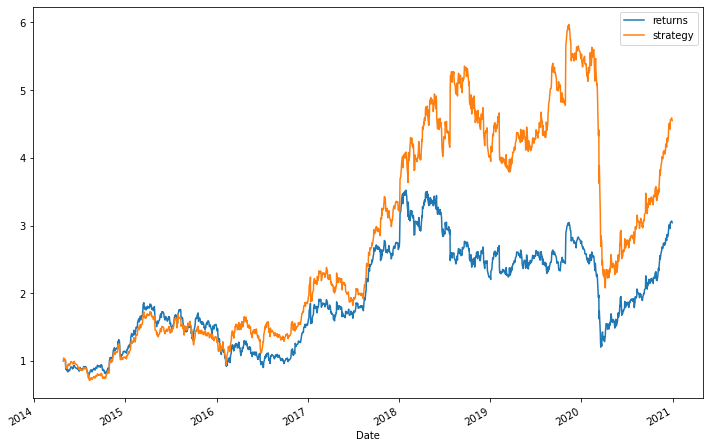

In [29]:
training_data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(12, 8));

In [30]:
model.evaluate(test_data_n[cols], test_data['direction'])

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 0.7352


[0.7281639575958252, 0.5322195887565613]

In [31]:
pred = np.where(model.predict(test_data_n[cols]) > 0.5, 1, 0)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [32]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [33]:
test_data['prediction'].value_counts()

 1    783
-1     55
Name: prediction, dtype: int64

In [34]:
test_data['strategy'] = (test_data['prediction'] * test_data['returns'])

In [35]:
test_data[['returns', 'strategy']].sum().apply(np.exp)

returns     2.449456
strategy    2.751285
dtype: float64

<AxesSubplot:xlabel='Date'>

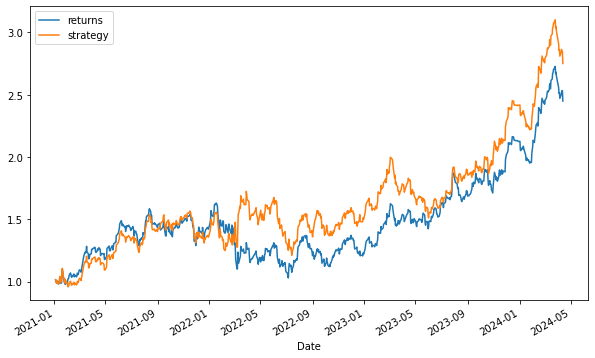

In [36]:
test_data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [37]:
#Gross performance of Stellantis compared to the Deep learning strategy

In [39]:
mean_logrets=np.exp(test_data[['returns', 'strategy']].mean() * 252) - 1
mean_logrets

returns     0.309180
strategy    0.355737
dtype: float64

In [40]:
std_logrets=(test_data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5
std_logrets

returns     0.323313
strategy    0.323947
dtype: float64